In [1]:
! pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

<ipython-input-2-17efb399d48f>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")

In [4]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5846,Built-up Area,Ready To Move,Sarjapur Road,3 BHK,MJinele,1374,3.0,2.0,51.0
2528,Super built-up Area,Ready To Move,Palace Guttahalli,4 BHK,NaN,3600,4.0,NaN,365.0
94,Super built-up Area,17-Aug,Thanisandra,2 BHK,Bhmesy,1296,2.0,3.0,80.0
2796,Built-up Area,Ready To Move,Electronic City,3 BHK,Itelaa,880,2.0,1.0,18.0
7674,Super built-up Area,Ready To Move,Old Madras Road,3 BHK,Sastaat,1859,3.0,2.0,121.0


In [5]:
df.shape

(13320, 9)

**Understanding** **the** **data**

In [6]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.isnull().sum()  


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.isnull().sum() [df.isnull().sum() != 0].sort_values(ascending = False) /len(df)*100


society     41.306306
balcony      4.572072
bath         0.548048
size         0.120120
location     0.007508
dtype: float64

In [10]:
#removing society and availability columns
df.drop(columns = ["availability", "society"], inplace = True)

In [11]:
#removing null values of location
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
#filling missing value of location by mode
df['location']=df['location'].fillna('Sarjapur  Road ')

In [13]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
df['size']=df['size'].fillna('2 BHK')

In [15]:
df['bath'].value_counts()


2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [16]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [17]:
df['balcony'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64>

In [18]:
df['balcony']=df['balcony'].fillna(df['balcony'].mean())

In [19]:
df2=df.isna().sum()
df2

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

Missing values are removed


Step 2 Converting object data into float

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   size        13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [21]:
for i in df["total_sqft"]:
  try:
    float(i)
  except:
    print(i)

2100 - 2850
3010 - 3410
2957 - 3450
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
1520 - 1740
34.46Sq. Meter
1195 - 1440
1200 - 2400
4125Perch
1120 - 1145
4400 - 6640
3090 - 5002
4400 - 6800
1160 - 1195
1000Sq. Meter
4000 - 5249
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
3606 - 5091
650 - 665
633 - 666
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
1440 - 1884
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
660 - 670
4000 - 5249
1500Sq. Meter
620 - 933
142.61Sq. Meter
2695 - 2940
2000 - 5634
1574Sq. Yards
3450 - 3472
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2249.81 - 4112.19
3436 - 3643
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
1200 - 2400
1500 - 2400
117Sq. Yards
934 - 1437
980 - 1030
1564 - 1850
1446 - 1506
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
1430 - 1630
704 - 730
1482 - 1846
2805 - 3565
3293 - 5314
1210 - 1477
3369 - 3464
1125 - 1500
167S

In [22]:
df[df["total_sqft"]=="2650 - 2990"]

,area_type,location,size,total_sqft,bath,balcony,price
10467,Super built-up Area,Harlur,4 BHK,2650 - 2990,4.0,0.0,153.5


In [23]:
df.loc[10466: 10470]

,area_type,location,size,total_sqft,bath,balcony,price
10466,Carpet Area,8th Phase JP Nagar,1 BHK,500,1.0,1.0,33.0
10467,Super built-up Area,Harlur,4 BHK,2650 - 2990,4.0,0.0,153.5
10468,Built-up Area,Bommenahalli,4 Bedroom,1632,3.0,0.0,140.0
10469,Super built-up Area,Rachenahalli,2 BHK,1167,2.0,2.0,37.5
10470,Super built-up Area,Domlur,2 BHK,1276,2.0,2.0,80.0


In [24]:
df[df["total_sqft"] == "86.72Sq. Meter"]

,area_type,location,size,total_sqft,bath,balcony,price
10491,Super built-up Area,Rajapura,2 BHK,86.72Sq. Meter,2.0,2.0,40.0


In [25]:
df.loc[10490: 10494]

,area_type,location,size,total_sqft,bath,balcony,price
10490,Super built-up Area,Kanakpura Road,3 BHK,1200,2.0,2.0,42.0
10491,Super built-up Area,Rajapura,2 BHK,86.72Sq. Meter,2.0,2.0,40.0
10492,Super built-up Area,Dairy Circle,3 BHK,2735,4.0,2.0,340.0
10493,Built-up Area,Austin Town,2 BHK,950,2.0,0.0,65.0
10494,Built-up Area,Bommasandra Industrial Area,3 BHK,1491,3.0,3.0,40.5


In [26]:
df.loc[10490: 10494]

,area_type,location,size,total_sqft,bath,balcony,price
10490,Super built-up Area,Kanakpura Road,3 BHK,1200,2.0,2.0,42.0
10491,Super built-up Area,Rajapura,2 BHK,86.72Sq. Meter,2.0,2.0,40.0
10492,Super built-up Area,Dairy Circle,3 BHK,2735,4.0,2.0,340.0
10493,Built-up Area,Austin Town,2 BHK,950,2.0,0.0,65.0
10494,Built-up Area,Bommasandra Industrial Area,3 BHK,1491,3.0,3.0,40.5


In [27]:
for i in df.index:
  try:
    float(df["total_sqft"].loc[i])
    df["total_sqft"].loc[i]=float(df["total_sqft"].loc[i])

  except:
    try:
      b=df["total_sqft"].loc[i].split("-")
      df["total_sqft"].loc[i]=(float(b[0])+float(b[1]))/2
    except:
    
     df["total_sqft"].loc[i] = np.nan  

<ipython-input-27-d6d56b70ccca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_sqft"].loc[i]=float(df["total_sqft"].loc[i])
<ipython-input-27-d6d56b70ccca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_sqft"].loc[i]=(float(b[0])+float(b[1]))/2
<ipython-input-27-d6d56b70ccca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_sqft"].loc[i] = np.nan


In [28]:
df["total_sqft"] = df["total_sqft"].astype("float")

In [29]:
df["size"][df["size"] == "1 RK"]

24       1 RK
782      1 RK
1363     1 RK
2486     1 RK
2557     1 RK
2788     1 RK
4876     1 RK
5079     1 RK
5285     1 RK
6586     1 RK
7638     1 RK
8385     1 RK
10576    1 RK
Name: size, dtype: object

In [30]:
df.loc[780:783]

,area_type,location,size,total_sqft,bath,balcony,price
780,Super built-up Area,Kammasandra,2 BHK,674.0,2.0,1.000000,33.0
781,Super built-up Area,Kaggadasapura,2 BHK,1185.0,2.0,1.000000,41.0
782,Super built-up Area,Thanisandra,1 RK,445.0,1.0,0.000000,28.0
783,Built-up Area,Mylasandra,6 Bedroom,900.0,7.0,1.584376,76.0


In [31]:
df["size"][df["size"] == "1 RK"] = 0.5

<ipython-input-31-62ec67333f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"][df["size"] == "1 RK"] = 0.5


In [32]:
df.loc[780:783]

,area_type,location,size,total_sqft,bath,balcony,price
780,Super built-up Area,Kammasandra,2 BHK,674.0,2.0,1.000000,33.0
781,Super built-up Area,Kaggadasapura,2 BHK,1185.0,2.0,1.000000,41.0
782,Super built-up Area,Thanisandra,0.5,445.0,1.0,0.000000,28.0
783,Built-up Area,Mylasandra,6 Bedroom,900.0,7.0,1.584376,76.0


In [33]:
for i in df.index:
  try:
    b = df["size"].loc[i].split(" ")
    df["size"].loc[i] = float(b[0])
  except:
    pass

<ipython-input-33-bf4bb58e2319>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size"].loc[i] = float(b[0])


In [34]:
df.loc[780:783]

,area_type,location,size,total_sqft,bath,balcony,price
780,Super built-up Area,Kammasandra,2.0,674.0,2.0,1.000000,33.0
781,Super built-up Area,Kaggadasapura,2.0,1185.0,2.0,1.000000,41.0
782,Super built-up Area,Thanisandra,0.5,445.0,1.0,0.000000,28.0
783,Built-up Area,Mylasandra,6.0,900.0,7.0,1.584376,76.0


In [35]:
df["size"] = df["size"].astype("float")

In [36]:
df["balcony"]=df["balcony"].astype("float")

In [37]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [38]:
df.dropna(inplace = True)

In [39]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13274 non-null  object 
 1   location    13274 non-null  object 
 2   size        13274 non-null  float64
 3   total_sqft  13274 non-null  float64
 4   bath        13274 non-null  float64
 5   balcony     13274 non-null  float64
 6   price       13274 non-null  float64
dtypes: float64(5), object(2)
memory usage: 829.6+ KB


columns are converted into float


Step 3 handling outliers in data

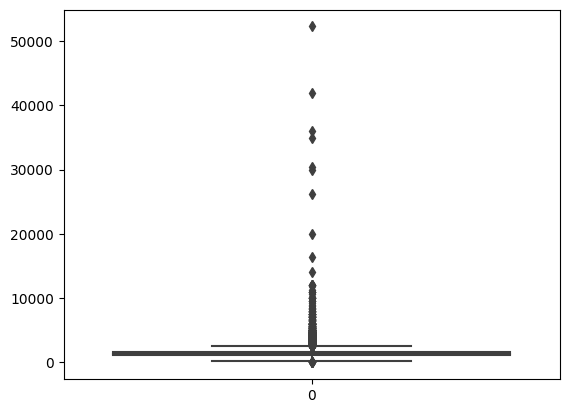

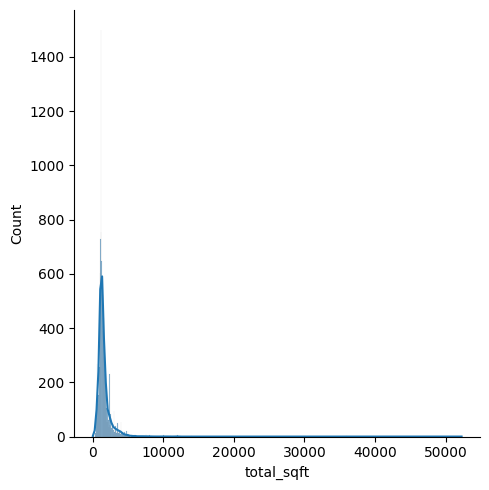

In [41]:
#boxplot & displot of all data to check outliers & skewness
sns.boxplot(df["total_sqft"])
sns.displot(df["total_sqft"], kde = True)

In [42]:
q1 = df["total_sqft"].quantile(0.25)
q3 = df["total_sqft"].quantile(0.75)
iqr = q3 - q1


<AxesSubplot: xlabel='total_sqft', ylabel='Count'>

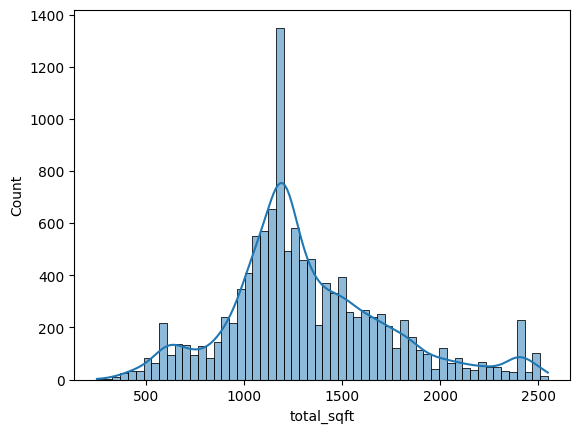

In [43]:
sns.histplot(df[(df["total_sqft"] <= (q3 + 1.5*iqr)) & (df["total_sqft"] >= (q1 - 1.5*iqr))]["total_sqft"], kde = True)

In [44]:
len(df[(df["total_sqft"] <= (q3 + 1.5*iqr)) & (df["total_sqft"] >= (q1 - 1.5*iqr))]["total_sqft"])

12106

In [45]:
df = df[(df["total_sqft"] >= (q1 - 1.5*iqr)) & (df["total_sqft"] <= (q3 + 1.5*iqr))]


In [46]:
temp_df = df[(df["total_sqft"] > (q3 + 1.5*iqr)) | (df["total_sqft"] < (q1 - 1.5*iqr))].copy()
temp_df

,area_type,location,size,total_sqft,bath,balcony,price


In [47]:
temp_df[temp_df["size"] == 1]["total_sqft"].median()

nan

In [48]:
for i in temp_df["size"].unique():
  print(f"{i} --> {temp_df[temp_df['size'] == i]['total_sqft'].median()} " )

<AxesSubplot: >

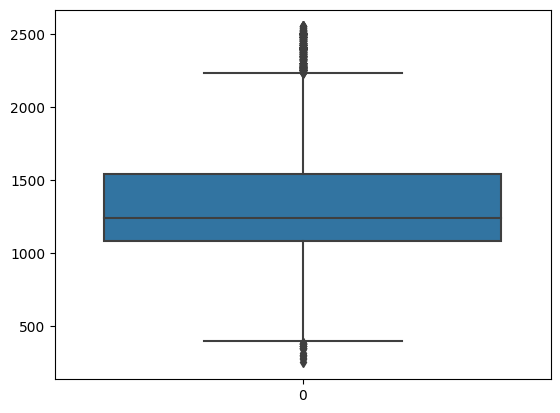

In [49]:
sns.boxplot(df['total_sqft'])

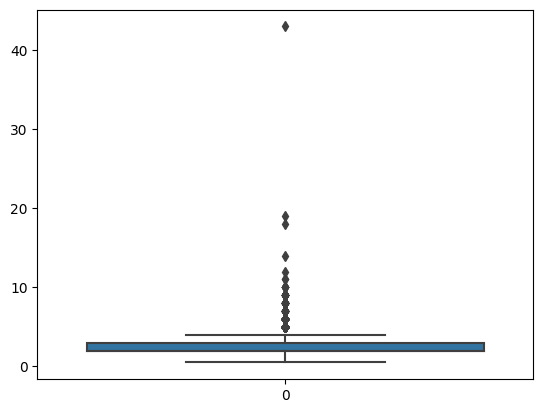

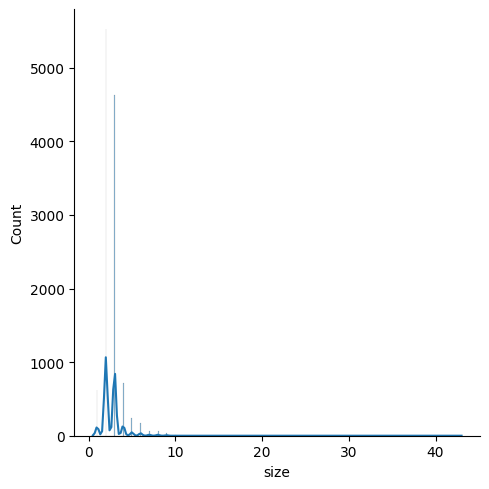

In [50]:
sns.boxplot(df["size"])
sns.displot(df["size"], kde = True)

In [51]:
def percentile_values(col_name, df):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  lw = q1 - 1.5*iqr
  return (ul, lw)

In [52]:
ul, lw = percentile_values("size", df)

In [53]:
df[df["size"] > ul]["size"].value_counts()

5.0     240
6.0     174
7.0      69
8.0      67
9.0      36
10.0      8
11.0      2
19.0      1
43.0      1
14.0      1
12.0      1
18.0      1
Name: size, dtype: int64

In [54]:
df[df["size"] <= 5].shape

(11745, 7)

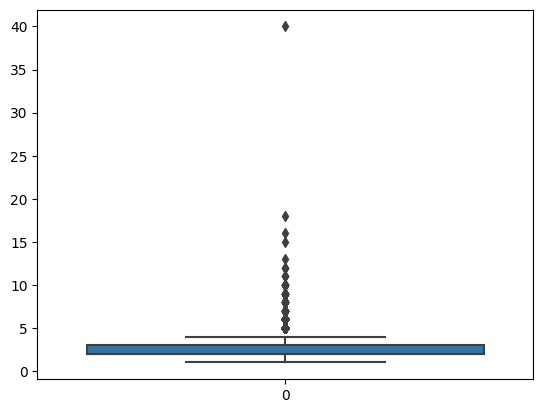

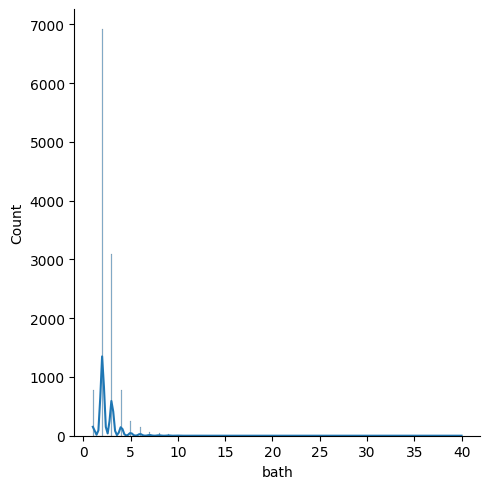

In [55]:
sns.boxplot(df['bath'])
sns.displot(df["bath"], kde = True)

In [56]:
df[(df["bath"] >= 4.5)][df[(df["bath"] >= 4.5)]["bath"] > (df[(df["bath"] >= 4.5)]["size"] + 1)]

,area_type,location,size,total_sqft,bath,balcony,price
84,Super built-up Area,EPIP Zone,3.0,1499.0,5.0,2.000000,102.0
209,Plot Area,Padmanabhanagar,4.0,1736.0,6.0,0.000000,190.0
938,Plot Area,5th Phase JP Nagar,9.0,1260.0,11.0,1.584376,290.0
1068,Plot Area,2nd Stage Nagarbhavi,6.0,2400.0,8.0,3.000000,450.0
1478,Super built-up Area,Binny Pete,3.0,2465.0,5.0,2.000000,234.0
1953,Plot Area,KR Puram,8.0,1200.0,12.0,1.584376,110.0
1978,Plot Area,BTM 2nd Stage,3.0,1260.0,5.0,1.000000,185.0
1979,Plot Area,Hongasandra,8.0,990.0,12.0,0.000000,120.0
2184,Plot Area,NS Palya,8.0,1500.0,10.0,3.000000,165.0
2439,Plot Area,3rd Block Banashankari,6.0,2400.0,8.0,2.000000,650.0


In [57]:
bath_index = df[(df["bath"] >= 4.5)][df[(df["bath"] >= 4.5)]["bath"] > (df[(df["bath"] >= 4.5)]["size"] + 1)].index

In [58]:
df.drop(index = bath_index, inplace = True)

<ipython-input-58-ace90adec9dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = bath_index, inplace = True)


Step 4 Ordinal Encoding

In [59]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[["Carpet  Area", "Built-up  Area", "Super built-up  Area", "Plot  Area"]])
df["area_type"] = oe.fit_transform(df[["area_type"]])

<ipython-input-59-6482bc470e01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_type"] = oe.fit_transform(df[["area_type"]])


In [60]:
df["area_type"]

0        2.0
2        1.0
3        2.0
4        2.0
5        2.0
        ... 
13312    2.0
13313    2.0
13314    2.0
13317    1.0
13319    2.0
Name: area_type, Length: 12055, dtype: float64

In [61]:
df['location'].value_counts()

Whitefield                                  446
Sarjapur  Road                              343
Electronic City                             300
Kanakpura Road                              266
Thanisandra                                 223
                                           ... 
whitefiled                                    1
Medi Agrahara                                 1
Ramaswamy Palya - Kammanahalli Main Road      1
Sadduguntepalya                               1
Abshot Layout                                 1
Name: location, Length: 1219, dtype: int64

In [62]:
df["location"].value_counts()[df["location"].value_counts() <= 5].sum()

1719

In [63]:
import string
string.punctuation
clean_location=[]
for i in df["location"]:
 i=i.replace("","")
 i=i.lower()
 i="".join([j for j in i if j  not in string.punctuation])
 clean_location.append(i)

In [64]:
a=pd.Series(clean_location).value_counts()
a

whitefield           446
sarjapur  road       343
electronic city      300
kanakpura road       266
thanisandra          223
                    ... 
meenakshi layout       1
vidyapeeta             1
maruthi extension      1
okalipura              1
abshot layout          1
Length: 1209, dtype: int64

In [65]:
remove_locality = df["location"].value_counts()[df["location"].value_counts() <= 25].index
for i in range(len(df)):
  if df["location"].iloc[i] in remove_locality:
    df["location"].iloc[i] = "other"
    

<ipython-input-65-2c1c8d953427>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["location"].iloc[i] = "other"


In [66]:
df["location"].value_counts()

other                 4648
Whitefield             446
Sarjapur  Road         343
Electronic City        300
Kanakpura Road         266
                      ... 
Dodda Nekkundi          27
Horamavu Banaswadi      27
Kothannur               26
Margondanahalli         26
BTM 2nd Stage           26
Name: location, Length: 105, dtype: int64

In [82]:
df["location"]

0        Electronic City Phase II
2                     Uttarahalli
3                           other
4                        Kothanur
5                      Whitefield
                   ...           
13312                   Bellandur
13313                 Uttarahalli
13314           Green Glen Layout
13317       Raja Rajeshwari Nagar
13319                Doddathoguru
Name: location, Length: 12055, dtype: object

In [67]:
#seprating target columns
X=df.drop(columns=["price"])
y=df["price"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
from sklearn.preprocessing import OneHotEncoder


In [70]:
enc = OneHotEncoder(handle_unknown = "infrequent_if_exist", sparse_output = False)

In [71]:
X_train_location_ohe = enc.fit_transform(X_train[["location"]])
X_test_location_ohe = enc.transform(X_test[["location"]])

In [72]:
X_train_location = pd.DataFrame(X_train_location_ohe, index = X_train.index)
X_test_location = pd.DataFrame(X_test_location_ohe, index = X_test.index)

In [73]:
X_train = pd.concat([X_train, X_train_location], axis = 1)

In [74]:
X_test = pd.concat([X_test, X_test_location], axis = 1)

In [75]:
X_train.drop(columns = "location", inplace = True)
X_test.drop(columns = "location", inplace = True)

In [76]:
from sklearn.ensemble import RandomForestRegressor


In [77]:
rf = RandomForestRegressor()
rf.fit(np.array(X_train), y_train)

RandomForestRegressor()

In [78]:
y_pred = rf.predict(np.array(X_test))

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

21.476466782298235

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5480240966328862